# Theory 5 - Deutsch-Jozsa Algorithm

In [ ]:
# ALWAYS RUN THIS CELL AFTER YOU LOAD (OR RELOAD) THE NOTEBOOK

# Generic cell for correct operation of QCO materials in Google Colab (jcperez@disca.upv.es):
!pip -qqq install qiskit[visualization]
import qiskit
%matplotlib inline
qiskit.__version__

# Not always necessary (jcperez@disca.upv.es):
!pip -qqq install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

# To fix a bug/version incompatibility in that file (jcperez@disca.upv.es):
!sed -ie 's/denominator >/denominator() >/g' /usr/local/lib/python3.8/dist-packages/qiskit/visualization/array.py

# To set graphical circuit drawing by default in qiskit (jcperez@disca.upv.es):
!mkdir ${HOME}/.qiskit 2>/dev/null
!printf "[default]\ncircuit_drawer = mpl\n" > ${HOME}/.qiskit/settings.conf

In this section, we first introduce the Deutsch-Jozsa problem, and classical and quantum algorithms to solve it. We then implement the quantum algorithm using Qiskit, and run it on a simulator and device.

## 1. Introduction <a id='introduction'></a>

The Deutsch-Jozsa algorithm, first introduced in Reference [1], was the first example of a quantum algorithm that performs better than the best classical algorithm. It showed that there can be advantages to using a quantum computer as a computational tool for a specific problem.

### 1.1 Deutsch-Jozsa Problem <a id='djproblem'> </a>

We are given a hidden Boolean function $f$, which takes as input a string of bits, and returns either $0$ or $1$, that is:

$$
f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$$

The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. Our task is to determine whether the given function is balanced or constant. 

Note that the Deutsch-Jozsa problem is an $n$-bit extension of the single bit Deutsch problem. 

### 1.2 The Classical Solution <a id='classical-solution'> </a>

Classically, in the best case, two queries to the oracle can determine if the hidden Boolean function, $f(x)$, is balanced: 
e.g. if we get both $f(0,0,0,...)\rightarrow 0$ and $f(1,0,0,...) \rightarrow 1$, then we know the function is balanced as we have obtained the two different outputs.  

In the worst case, if we continue to see the same output for each input we try, we will have to check exactly half of all possible inputs plus one in order to be certain that $f(x)$ is constant. Since the total number of possible inputs is $2^n$, this implies that we need $2^{n-1}+1$ trial inputs to be certain that $f(x)$ is constant in the worst case. For example, for a $4$-bit string, if we checked $8$ out of the $16$ possible combinations, getting all $0$'s, it is still possible that the $9^\textrm{th}$ input returns a $1$ and $f(x)$ is balanced. Probabilistically, this is a very unlikely event. In fact, if we get the same result continually in succession, we can express the probability that the function is constant as a function of $k$ inputs as:



$$ P_\textrm{constant}(k) = 1 - \frac{1}{2^{k-1}} \qquad \textrm{for } 1 < k \leq 2^{n-1}$$



Realistically, we could opt to truncate our classical algorithm early, say if we were over x% confident. But if we want to be 100% confident, we would need to check $2^{n-1}+1$ inputs.

These are the 4 possible 1-bit functions $f_i$ with their oputput values for every 1-bit input value $x$.

| $x$ || $f_1$ | $f_2$ | $f_3$ | $f_4$ |
|---- ||-------|-------|-------|-------|
|   0 ||   0   |   0   |   1   |   1   |
|   1 ||   0   |   1   |   0   |   1   |

Two of them are constant and the other two are balanced.
<p>

</p>

<p>
<font color='brown' size=+0>
EXERCISE: 

-<font color='brown' size=+0> Draw a table of all possible 2-bit functions $f_i(x)$ for all 2-bit values of $x$

-<font color='brown' size=+0> How many of them are constant and how many are balanced?


### 1.3 Quantum Solution <a id='quantum-solution'> </a>

Using a quantum computer, we can solve this problem with 100% confidence after only one call to the function $f(x)$, provided we have the function $f$ implemented as a quantum oracle, which maps the state $\vert x\rangle \vert y\rangle $ to $ \vert x\rangle \vert y \oplus f(x)\rangle$, where $\oplus$ is addition modulo $2$. Below is the generic circuit for the Deutsch-Jozsa algorithm.

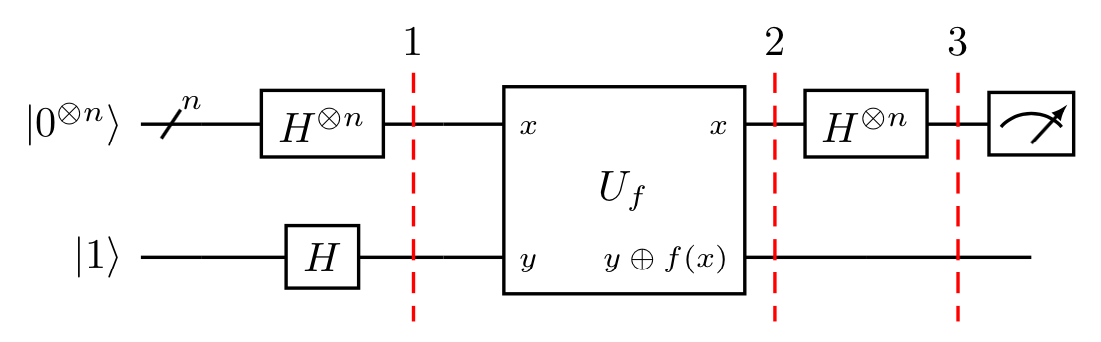




<font color='brown' size=+0>
EXERCISE: </font>

-<font color='brown' size=+0> Draw a table of all expressions $|x|y \oplus f_i(x)\rangle$ for all 1-bit functions $f_i(x)$ for all inputs $|x,y\rangle$</font>

-<font color='brown' size=+0> Try to map each column to a unitary matrix (or, equivalently, to a circuit that represents that function)</font>


# Now, let's go through the steps of the algorithm:

<ol>
   <li>
        Prepare two quantum registers. The first is an $n$-qubit register initialized to $|0\rangle$, and the second is a one-qubit register initialized to $|1\rangle$: 
        $$
          \vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle
        $$
   </li>
    
   <li>
        Apply a Hadamard gate to each qubit:

  $$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left(|0\rangle - |1 \rangle \right)$$

   </li>
   
   <li>
  Apply the quantum oracle $\vert x\rangle \vert y\rangle$ to $\vert x\rangle \vert y \oplus f(x)\rangle$ :
$$
  \begin{aligned}
            \lvert \psi_2 \rangle  
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) \\  
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle ) 
        \end{aligned}
$$
       
since for each $x,f(x)$ is either $0$ or $1$.

<font color='brown' size=+0>
EXERCISE: Decompose this expression in two conditional addends: one for the cases when $f(x)=0$ and another one when $f(x)=1$</font>

   </li>


   <li>
       At this point the second single qubit register may be ignored. Apply a Hadamard gate to each qubit in the first register:
$$
        \begin{aligned}
            \lvert \psi_3 \rangle 
                & = \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}
                    \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y} 
                    \vert y \rangle \right] \\
                & = \frac{1}{2^n}\sum_{y=0}^{2^n-1}
                    \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)}(-1)^{x \cdot y} \right]
                    \vert y \rangle
        \end{aligned}
$$
       
where $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ is the sum of the bitwise product.
   </li>

   <li>
       Measure the first register. Notice that the probability of measuring $\vert 0 \rangle ^{\otimes n} = \lvert \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)} \rvert^2$, which evaluates to $1$ if $f(x)$ is constant and $0$ if $f(x)$ is balanced. 
   </li>

</ol>

You can follow these steps in detail <a href="https://youtu.be/_LPRrmXWoeI?t=278">here.</a>

### 1.4 Why Does This Work? <a id='why-does-this-work'> </a>

- **Constant Oracle**

When the oracle is *constant*, it has no effect (up to a global phase) on the input qubits, and the quantum states before and after querying the oracle are the same. Since the H-gate is its own inverse, in Step 4 we reverse Step 2 to obtain the initial quantum state of $|00\dots 0\rangle$ in the first register.

$$
H^{\otimes n}\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
= 
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\quad \xrightarrow{\text{after } U_f} \quad
H^{\otimes n}\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
= 
\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
$$

- **Balanced Oracle**

After step 2, our input register is an equal superposition of all the states in the computational basis. When the oracle is *balanced*, phase kickback adds a negative phase to exactly half these states:

$$
U_f \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} 
= 
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} -1 \\ 1 \\ -1 \\ \vdots \\ 1 \end{bmatrix}
$$


The quantum state after querying the oracle is orthogonal to the quantum state before querying the oracle. Thus, in Step 4, when applying the H-gates, we must end up with a quantum state that is orthogonal to $|00\dots 0\rangle$. This means we should never measure the all-zero state. 

## Deustch interpretation
David Deustch explains the "new parallelism" that appears with quantum computation in the line of the Many Worlds Interpretation (MWI). This concept is usually attributed to Hugh Everett who wrote his PhD. thesis on it in the mid-1950s. But Erwin Schrödinger had formulated it a few years earlier. The goal was to get rid of the idea of the “collapse of the wave function.” In 1952, Schrödinger pointed out in a paper the ridiculousness of expecting a quantum superposition to collapse just because we look at it. It was, he wrote, “patently absurd” that the wave function should “be controlled in two entirely different ways, at times by the wave equation, but occasionally by direct interference of the observer, not controlled by the wave equation.”

Instead, he thought that, when the equation seems to describe different possibilities, they are “not alternatives but all really happen simultaneously”. Schrödinger’s idea was ignored and forgotten, regarded as impossible. Then Everett developed his own version of the MWI entirely independently (which was also completely ignored for many years). But it was Everett who introduced the idea of the Universe “splitting” into different versions of itself when faced with quantum choices. 

It wasn’t until the late 1960s that the idea gained some momentum when it was taken up and enthusiastically promoted by Bryce DeWitt who wrote: “every quantum transition taking place in every star, in every galaxy, in every remote corner of the universe is splitting our local world on Earth into myriad copies of itself.” 

To John Bell, one of the people who contributed the most to the field, the MWI seemed extravagantly vague, almost silly, and yet he recognized it had something distinctive to say in connection with the “Einstein Podolsky Rosen puzzle,” and wished that someone could formulate some precise version of it to see if that was really so.

The precise version of the MWI came from David Deutsch and, in effect, put Schrödinger’s version of the idea on a secure footing. Deustch met Everett at the only talk where he ever presented his ideas to a large audience. Convinced that the MWI was the right way to understand the quantum world, Deutsch became a pioneer in the field of quantum computing, not through any interest in computers as such, but because of his belief that the existence of a working quantum computer would prove the reality of the MWI.

In the Deutsch–Schrödinger interpretation, there is an infinite variety of universes (a Multiverse) corresponding to all possible solutions to the quantum wave function. Deutsch argues that, when two or more previously identical universes are forced by quantum processes to become distinct, there is a temporary interference between the universes, which becomes suppressed as they evolve. It is this interaction that causes the observed results of those experiments.

Therefore, Deutsch’s explanation of the power of his algorithm is that the calculation is carried out simultaneously on identical computers in each of the parallel universes corresponding to the superpositions. For a three-qubit computer, that means eight "superpositions of computer scientists" working on the same problem using identical computers to get an answer. It is no surprise that they should “collaborate” in this way, since the experimenters are identical, with identical reasons for tackling the same problem. That isn’t too difficult to visualize. But when we build a 300-qbit machine—which will surely happen—we will, if Deutsch is right, it will involve a “collaboration” between more universes than there are atoms in our visible Universe. It is a matter of choice whether you think that is too great a load of *metaphysical baggage.* But if you do, you will need some other way to explain why quantum computers work.

Most quantum computer scientists prefer not to think about these implications, but the fact, noted by Schrödinger, is that there is nothing in his equations referring to a collapse of the wave function, and we can think of a Universal Wave Function, just one, which describes the entire world as a superposition of states, and therefore a Multiverse made up of a superposition of universes. 

This section uses literal text excerpts from <a href="https://thereader.mitpress.mit.edu/the-many-worlds-theory/">here</a>. One of the most prominent popularizers of this theory today is <a href="https://www.youtube.com/watch?v=nOgalPdfHxM">Sean Carrol</a>. 

You can listen to the lectures of Deustch himself <a href="https://www.youtube.com/playlist?list=PL4cl2VeMbE330GKLkYIE8UBrrYdp8L9mR">here</a>

## 2. Worked Example  <a id='example'></a>

Let's go through a specific example for a two bit balanced function: 

Consider a two-bit function $f(x_0,x_1)=x_0 \oplus x_1$ such that 

$f(0,0)=0$

$f(0,1)=1$

$f(1,0)=1$

$f(1,1)=0$

The corresponding phase oracle of this two-bit oracle is $U_f \lvert x_1, x_0 \rangle = (-1)^{f(x_1, x_0)}\lvert x \rangle$

We will now check if this oracle works as expected by taking a example state
$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

<ol>
    <li> The first register of two qubits is initialized to $|00\rangle$ and the second register qubit to $|1\rangle$ 
        
(Note that we are using subscripts 0, 1, and 2 to index the qubits. A subscript of "01" indicates the state of the register containing qubits 0 and 1)
    

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

 
   </li>
    
   <li> Apply Hadamard on all qubits
    

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}  $$

 
   </li>
    
   <li> The oracle function can be implemented as $\text{Q}_f = $CNOT$_{02}$CNOT$_{12}$,
   (this is developed in detail <a href="https://quantumcomputing.stackexchange.com/questions/10257/understanding-the-working-of-oracle-in-deutsch-jozsa-algorithm">here</a>)
$$
       \begin{align*}
            \lvert \psi_2 \rangle =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \oplus 0 \oplus 0 \rangle - \lvert 1 \oplus 0 \oplus 0 \rangle \right)_{2} \\
                  + \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \oplus 0 \oplus 1 \rangle - \lvert 1 \oplus 0 \oplus 1 \rangle \right)_{2} \\
                  + \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0 \oplus 1 \oplus 0 \rangle - \lvert 1 \oplus 1 \oplus 0 \rangle \right)_{2} \\
                  + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \oplus 1 \oplus 1 \rangle - \lvert 1 \oplus 1 \oplus 1 \rangle \right)_{2} \right]
        \end{align*}
$$
   </li>
    
   <li>Simplifying this, we get the following: 
$$
       \begin{aligned}
        \lvert \psi_2 \rangle & = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} - \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert  1 \rangle \right)_{2} - \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0  \rangle - \lvert 1 \rangle \right)_{2} + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}  \right] \\
        & = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} \\
        & = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{0} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{1} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}
        \end{aligned}
$$
   </li>
    
   <li> Apply Hadamard on the first register
        

$$ \lvert \psi_3\rangle = \lvert 1 \rangle_{0} \otimes \lvert 1 \rangle_{1} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} $$


   </li>
   
   <li> Measuring the first two qubits will give the non-zero $11$, indicating a balanced function.
   </li>
</ol>

## 3. Creating Quantum Oracles <a id='creating-quantum-oracles'> </a>

Let's see some different ways we can create a quantum oracle. 

For a constant function, it is simple:

$\qquad$ 1. if f(x) = 0, then apply the $I$ gate to the qubit in register 2.  
$\qquad$ 2. if f(x) = 1, then apply the $X$ gate to the qubit in register 2.

For a balanced function, there are many different circuits we can create. One of the ways we can guarantee our circuit is balanced is by performing a CNOT for each qubit in register 1, with the qubit in register 2 as the target. For example:

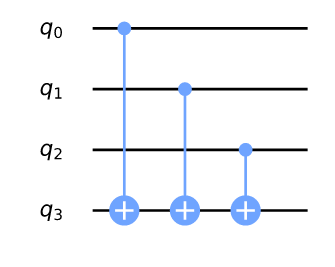

In the image above, the top three qubits form the input register, and the bottom qubit is the output register. We can see which input states give which output in the table below:

| Input states that output 0 | Input States that output 1 |
|:--------------------------:|:--------------------------:|
|             000            |             001            |
|             011            |             100            |
|             101            |             010            |
|             110            |             111            |


We can change the results while keeping them balanced by wrapping selected controls in X-gates. For example, see the circuit and its results table below:

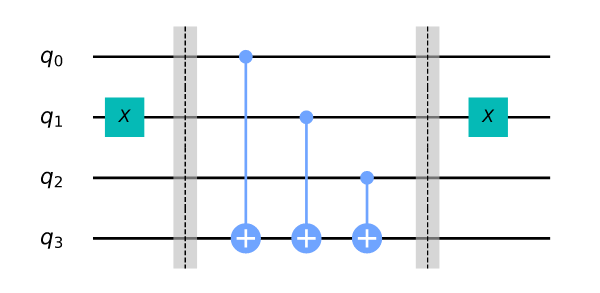

| Input states that output 0 | Input states that output 1 |
|:--------------------------:|:--------------------------:|
|             001            |             000            |
|             010            |             011            |
|             100            |             101            |
|             111            |             110            |

## 4. Qiskit Implementation <a id='implementation'></a>

We now implement the Deutsch-Jozsa algorithm for the example of a three-bit function, with both constant and balanced oracles. First let's do our imports:

In [ ]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

Next, we set the size of the input register for our oracle:

In [ ]:
# set the length of the n-bit input string. 
n = 3

### 4.1 Constant Oracle <a id='const_oracle'></a>
Let's start by creating a constant oracle, in this case the input has no effect on the output so we just randomly set the output qubit to be 0 or 1:

In [ ]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

### 4.2 Balanced Oracle <a id='balanced_oracle'></a>

In [ ]:
balanced_oracle = QuantumCircuit(n+1)

Next, we create a balanced oracle. As we saw in section 1b, we can create a balanced oracle by performing CNOTs with each input qubit as a control and the output bit as the target. We can vary the input states that give 0 or 1 by wrapping some of the controls in X-gates. Let's first choose a binary string of length `n` that dictates which controls to wrap:

In [ ]:
b_str = "101"

Now we have this string, we can use it as a key to place our X-gates. For each qubit in our circuit, we place an X-gate if the corresponding digit in `b_str` is `1`, or do nothing if the digit is `0`.

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

Next, we do our controlled-NOT gates, using each input qubit as a control, and the output qubit as a target:

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()

Finally, we repeat the code from two cells up to finish wrapping the controls in X-gates:

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

We have just created a balanced oracle! All that's left to do is see if the Deutsch-Jozsa algorithm can solve it.

### 4.3 The Full Algorithm <a id='full_alg'></a>

Let's now put everything together. This first step in the algorithm is to initialize the input qubits in the state $|{+}\rangle$ and the output qubit in the state $|{-}\rangle$:

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

Next, let's apply the oracle. Here we apply the `balanced_oracle` we created above:

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit.compose(balanced_oracle, inplace='true')
dj_circuit.draw()

Finally, we perform H-gates on the $n$-input qubits, and measure our input register:

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit.compose(balanced_oracle, inplace='true')

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

Let's see the output:

In [ ]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results=aer_sim.run(dj_circuit).result()
answer = results.get_counts(dj_circuit)

plot_histogram(answer)

We can see from the results above that we have a 0% chance of measuring `000`. This correctly predicts the function is balanced. 

### 4.4 Generalised Circuits <a id='general_circs'></a>

Below, we provide a generalised function that creates Deutsch-Jozsa oracles and turns them into quantum gates. It takes the `case`, (either `'balanced'` or '`constant`', and `n`, the size of the input register:

In [ ]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

Let's also create a function that takes this oracle gate and performs the Deutsch-Jozsa algorithm on it:

In [ ]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

Finally, let's use these functions to play around with the algorithm:

In [ ]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

And see the results of running this circuit:

In [ ]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

## 5. Experiment with Real Devices <a id='device'></a>

We can run the circuit on the real device as shown below. We first look for the least-busy device that can handle our circuit.

In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
from qiskit import IBMQ
#IBMQ.enable_account(token="72db52827907b511f5ea904b2b293b4b53efeaa3c397f2efb1a57f8ffa7c327bce6b42a5a366bfcdd9ae39f5efd2fb2237c5a63407dcbf6359b4713bf32ca58b")

# IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

In [ ]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

As we can see, the most likely result is `1111`. The other results are due to errors in the quantum computation. 

## 6. Problems <a id='problems'></a>

1. Are you able to create a balanced or constant oracle of a different form?

2. The function `dj_problem_oracle` (below) returns a Deutsch-Jozsa oracle for `n = 4` in the form of a gate. The gate takes 5 qubits as input where the final qubit (`q_4`) is the output qubit (as with the example oracles above). You can get different oracles by giving `dj_problem_oracle` different integers between 1 and 5. Use the Deutsch-Jozsa algorithm to decide whether each oracle is balanced or constant (**Note:** It is highly recommended you try this example using the `aer_simulator` instead of a real device).

In [ ]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(1)

## 7. References <a id='references'></a>

1. David Deutsch and Richard Jozsa (1992). "Rapid solutions of problems by quantum computation". Proceedings of the Royal Society of London A. 439: 553–558.  [doi:10.1098/rspa.1992.0167](https://doi.org/10.1098%2Frspa.1992.0167).
2. R. Cleve; A. Ekert; C. Macchiavello; M. Mosca (1998). "Quantum algorithms revisited". Proceedings of the Royal Society of London A. 454: 339–354. [doi:10.1098/rspa.1998.0164](https://doi.org/10.1098%2Frspa.1998.0164).

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table